# Week 1 — Data Loading & Exploratory Data Analysis (EDA)

In Week 1, we begin by setting up the project environment, loading the NASA CMAPSS turbofan dataset from our local `data/raw/` directory, and performing initial exploratory data analysis (EDA). 

This notebook will help us understand:
- The structure and size of the dataset  
- Sensor behaviors over time  
- Engine degradation patterns  
- Correlations between variables  
- Useful vs. non-useful sensors for modeling  

This is the foundation for Weeks 2–4.

## Step 1 — Import Libraries and Configure Paths

Here, we import the required Python libraries and configure **relative paths** so the notebook works both locally and on GitHub/Colab.  
We avoid absolute paths (like `C:\Users\Kal\...`) so the project is fully portable.

In [17]:
from pathlib import Path
import pandas as pd

# Correct base directory
BASE_DIR = Path(r"C:\Users\Kal\Predictive Maintenance Aircraft Engine")

# Correct data directory (raw folder)
DATA_DIR = BASE_DIR / "data" / "raw"

# Column names
col_names = [
    "engine_id", "cycle",
    "setting_1", "setting_2", "setting_3",
] + [f"sensor_{i}" for i in range(1, 22)]

# Dataset paths
train_path = DATA_DIR / "train_FD001.txt"
test_path  = DATA_DIR / "test_FD001.txt"
rul_path   = DATA_DIR / "RUL_FD001.txt"

print("Train path:", train_path)
print("Exists?", train_path.exists())

Train path: C:\Users\Kal\Predictive Maintenance Aircraft Engine\data\raw\train_FD001.txt
Exists? True


## Step 2 — Load the NASA CMAPSS Dataset

We now load the FD001 dataset into Pandas DataFrames:

- `train_df`: full run-to-failure time-series data  
- `test_df`: truncated time-series data  
- `rul_df`: remaining useful life (RUL) labels for each engine in the test set  

These files are stored under `data/raw/`.


In [18]:
train_df = pd.read_csv(train_path, sep=r"\s+", header=None, names=col_names)
test_df  = pd.read_csv(test_path,  sep=r"\s+", header=None, names=col_names)
rul_df   = pd.read_csv(rul_path,   sep=r"\s+", header=None, names=["RUL"])

train_df.head()

,engine_id,cycle,setting_1,setting_2,setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


## Step 3 — Display Dataset Structure and Summary

In this step, we inspect:

- Number of rows and columns  
- Data types  
- Missing values  
- Statistical summary of sensor readings  
- First few rows of the dataset  

This helps verify that the dataset loaded correctly and gives an initial understanding of the data.

In [21]:
train_df.shape, test_df.shape, rul_df.shape

((20631, 26), (13096, 26), (100, 1))

In [22]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   engine_id  20631 non-null  int64  
 1   cycle      20631 non-null  int64  
 2   setting_1  20631 non-null  float64
 3   setting_2  20631 non-null  float64
 4   setting_3  20631 non-null  float64
 5   sensor_1   20631 non-null  float64
 6   sensor_2   20631 non-null  float64
 7   sensor_3   20631 non-null  float64
 8   sensor_4   20631 non-null  float64
 9   sensor_5   20631 non-null  float64
 10  sensor_6   20631 non-null  float64
 11  sensor_7   20631 non-null  float64
 12  sensor_8   20631 non-null  float64
 13  sensor_9   20631 non-null  float64
 14  sensor_10  20631 non-null  float64
 15  sensor_11  20631 non-null  float64
 16  sensor_12  20631 non-null  float64
 17  sensor_13  20631 non-null  float64
 18  sensor_14  20631 non-null  float64
 19  sensor_15  20631 non-null  float64
 20  sensor

In [23]:

train_df.head()

,engine_id,cycle,setting_1,setting_2,setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [20]:
train_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   engine_id  20631 non-null  int64  
 1   cycle      20631 non-null  int64  
 2   setting_1  20631 non-null  float64
 3   setting_2  20631 non-null  float64
 4   setting_3  20631 non-null  float64
 5   sensor_1   20631 non-null  float64
 6   sensor_2   20631 non-null  float64
 7   sensor_3   20631 non-null  float64
 8   sensor_4   20631 non-null  float64
 9   sensor_5   20631 non-null  float64
 10  sensor_6   20631 non-null  float64
 11  sensor_7   20631 non-null  float64
 12  sensor_8   20631 non-null  float64
 13  sensor_9   20631 non-null  float64
 14  sensor_10  20631 non-null  float64
 15  sensor_11  20631 non-null  float64
 16  sensor_12  20631 non-null  float64
 17  sensor_13  20631 non-null  float64
 18  sensor_14  20631 non-null  float64
 19  sensor_15  20631 non-null  float64
 20  sensor

,engine_id,cycle,setting_1,setting_2,setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,2.063100e+04,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,5.186700e+02,642.680934,1590.523119,1408.933782,1.462000e+01,...,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705
std,29.227633,68.880990,0.002187,0.000293,0.0,6.537152e-11,0.500053,6.131150,9.000605,3.394700e-12,...,0.737553,0.071919,19.076176,0.037505,1.556432e-14,1.548763,0.0,0.0,0.180746,0.108251
min,1.000000,1.000000,-0.008700,-0.000600,100.0,5.186700e+02,641.210000,1571.040000,1382.250000,1.462000e+01,...,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,5.186700e+02,642.325000,1586.260000,1402.360000,1.462000e+01,...,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800
50%,52.000000,104.000000,0.000000,0.000000,100.0,5.186700e+02,642.640000,1590.100000,1408.040000,1.462000e+01,...,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900
75%,77.000000,156.000000,0.001500,0.000300,100.0,5.186700e+02,643.000000,1594.380000,1414.555000,1.462000e+01,...,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800
max,100.000000,362.000000,0.008700,0.000600,100.0,5.186700e+02,644.530000,1616.910000,1441.490000,1.462000e+01,...,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400


## Step 4 — Visualize Engine Lifetimes

Each engine runs until failure in the training set.  
We plot the maximum cycle count per engine to understand:

- How long engines typically last  
- Variety of degradation trajectories  
- Dataset variability  

This provides important context for modeling Remaining Useful Life (RUL).


<Axes: title={'center': 'Engine Lifetime Distribution'}, ylabel='Frequency'>

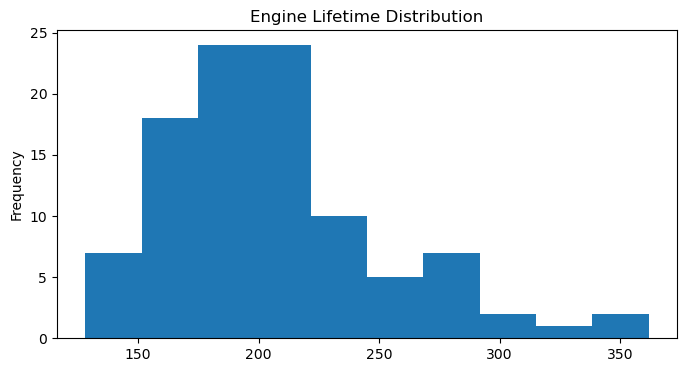

In [24]:
train_df.groupby("engine_id")["cycle"].max().plot(
    kind="hist", figsize=(8,4), title="Engine Lifetime Distribution"
)


## Step 4 — Visualize Sensor Behavior for a Single Engine

Here we plot sensor readings across cycles for a specific engine (Engine 1).  
This helps identify:

- Sensor drift  
- Trends showing degradation  
- Noisy or flat sensors  
- Which sensors contribute to predicting RUL  

You should repeat this for multiple sensors.

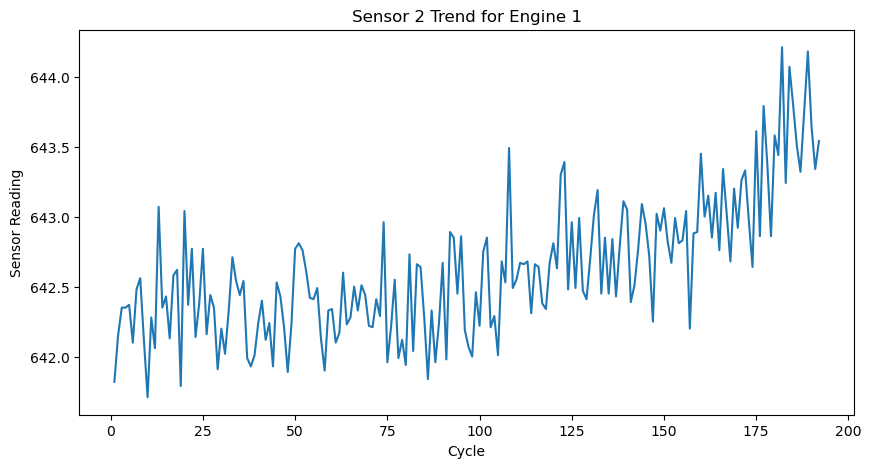

In [25]:
import matplotlib.pyplot as plt

engine_1 = train_df[train_df["engine_id"] == 1]

plt.figure(figsize=(10,5))
plt.plot(engine_1["cycle"], engine_1["sensor_2"])
plt.title("Sensor 2 Trend for Engine 1")
plt.xlabel("Cycle")
plt.ylabel("Sensor Reading")
plt.show()

## Step 6 — Correlation Heatmap

To understand relationships between sensors, we compute a correlation matrix.  
This helps us identify:

- Highly correlated sensors  
- Uninformative or redundant sensors  
- Multicollinearity  
- Sensor groups that move together  

It is an important step before feature engineering.


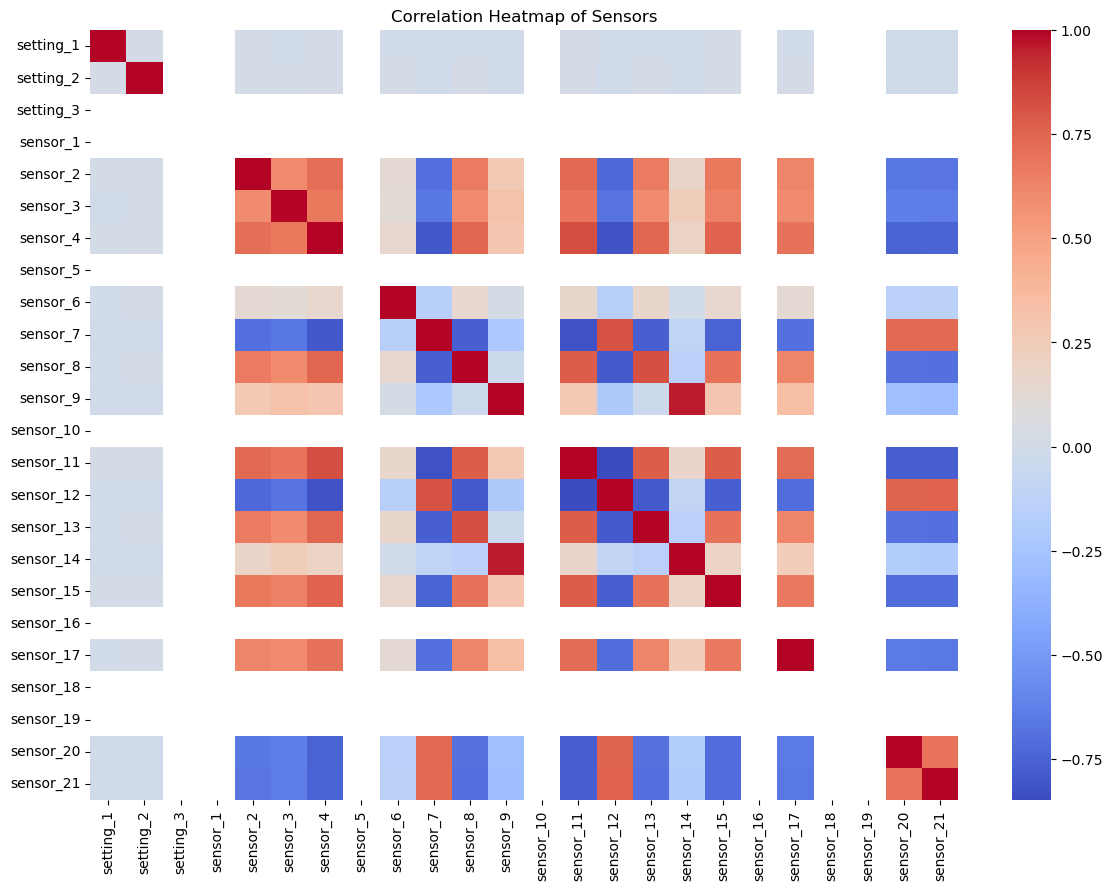

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14,10))
sns.heatmap(train_df.iloc[:, 2:].corr(), cmap="coolwarm")
plt.title("Correlation Heatmap of Sensors")
plt.show()


## Step 7 — Identify Useful & Non-Useful Sensors

Some sensors provide strong degradation signals, while others remain constant.  
Based on research and preliminary EDA:
## 🔥 Useful sensors:
- sensor_2  
- sensor_3  
- sensor_4  
- sensor_11  
- sensor_12  
- sensor4  

### 🚫 Useless or noisy sensors:
- sensor_1  
- sensor_5  
- sensor_10  
- sensor_16  
- sensor_18  

This information will guide Week 2 feature engineering.